In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


d:\anaconda3\envs\python3118\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9132 - loss: 0.0906 - val_accuracy: 0.9124 - val_loss: 0.0868
Epoch 2/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9136 - loss: 0.0860 - val_accuracy: 0.9124 - val_loss: 0.0872
Epoch 3/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9116 - loss: 0.0872 - val_accuracy: 0.9124 - val_loss: 0.0880
Epoch 4/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9216 - loss: 0.0776 - val_accuracy: 0.9124 - val_loss: 0.0876
Epoch 5/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9172 - loss: 0.0818 - val_accuracy: 0.9124 - val_loss: 0.0869
Epoch 6/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9129 - loss: 0.0859 - val_accuracy: 0.9124 - val_loss: 0.0878
Epoch 7/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9094 - loss: 0.0888 - val_accuracy: 0.9124 - val_loss: 0.0869
Epoch 8/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9180 - loss: 0.0801 - val_accu

C:\Users\blue\AppData\Local\Temp\ipykernel_29736\1684465679.py:63: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_window_data[-1, -1] = prediction  # 使用预测的趋势值替换窗口中的最后一行


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


C:\Users\blue\AppData\Local\Temp\ipykernel_29736\1684465679.py:69: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_price['Predicted_Trend'].iloc[-time_step:] = predicted_trend_last_5_df.values.flatten()
C:\Users\blue\AppData\Local\Temp\ipyk

Epoch 1/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 10267.0635 - mae: 94.9901 - val_loss: 1619.0175 - val_mae: 35.7901
Epoch 2/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1187.6709 - mae: 29.0639 - val_loss: 710.5645 - val_mae: 21.1752
Epoch 3/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 699.7570 - mae: 20.9316 - val_loss: 491.5969 - val_mae: 17.3018
Epoch 4/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 452.5481 - mae: 16.3380 - val_loss: 245.7707 - val_mae: 11.1598
Epoch 5/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 254.2974 - mae: 11.3875 - val_loss: 174.4626 - val_mae: 7.7215
Epoch 6/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 206.4590 - mae: 9.6559 - val_loss: 153.6591 - val_mae: 6.7556
Epoch 7/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 184.3484 - mae: 8.7887 - val_loss: 149.5294 - val_mae: 7.2277
Epoch 8/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 175.3706 - mae: 8.7754 - val_loss: 167.4926 - val_mae: 9.0851
Epo

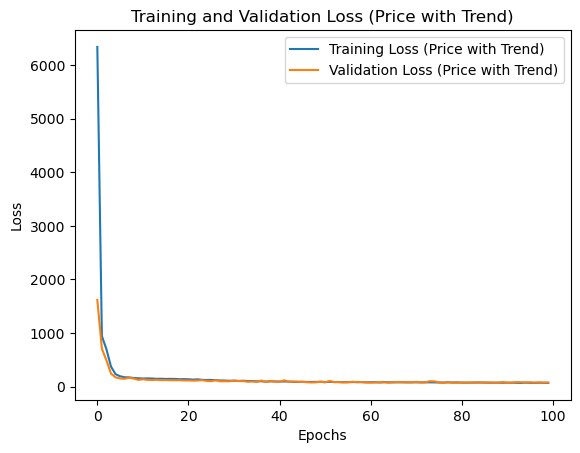

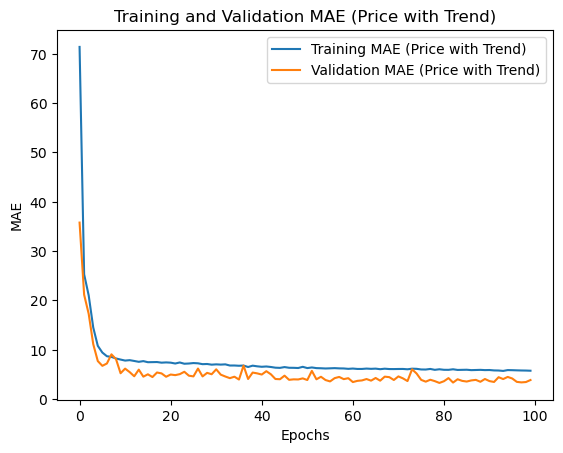

In [2]:

# 加载数据
df_price = pd.read_csv('TextBlob_Trustfilter.csv')
# 选择用于趋势预测的特征
selected_features = df_price[['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'SMA_5', 'SMA_10', 'Content_Sentiment_Score', 'Comment_Sentiment_Score']]
labels = df_price['Trend']

# 数值特征标准化/归一化
scaler = MinMaxScaler()
selected_features_scaled = scaler.fit_transform(selected_features)

time_step = 5  # 一周交易日为5天

# 创建训练集和测试集
def create_dataset(data, labels, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])
        y.append(labels[i + time_step])
    return np.array(X), np.array(y)

X_opt, y_opt = create_dataset(selected_features_scaled, labels.values, time_step)
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_opt, y_opt, test_size=0.3, random_state=42)

# 构建单层LSTM模型，并添加Dropout层
model_optimized = Sequential()
model_optimized.add(LSTM(150, input_shape=(time_step, X_train_opt.shape[2])))
model_optimized.add(Dropout(0.2))  # 添加Dropout层
model_optimized.add(Dense(1, activation='tanh'))

# 编译模型
optimizer_optimized = tf.keras.optimizers.Adam(learning_rate=0.001)
model_optimized.compile(optimizer=optimizer_optimized, loss='mse', metrics=['accuracy'])

# 训练模型
history_optimized = model_optimized.fit(X_train_opt, y_train_opt, epochs=100, batch_size=8, validation_data=(X_test_opt, y_test_opt))


# 使用趋势预测模型预测趋势
predicted_trend = model_optimized.predict(X_opt)

# 将 predicted_trend 转换为 DataFrame
predicted_trend_df = pd.DataFrame(predicted_trend, columns=['Predicted_Trend'])

# 拼接到 df_price 的最后一列
df_price = pd.concat([df_price, predicted_trend_df], axis=1)

# 最后一个完整窗口的数据 (5行)
last_window_data = selected_features_scaled[-time_step:]  # 选取最后一个完整窗口的特征数据

# 创建一个空的数组用于保存预测的趋势
predicted_trend_last_5 = []

# 使用模型逐步预测每一行的趋势
for i in range(time_step):
    # 将当前窗口的数据预测趋势
    prediction = model_optimized.predict(last_window_data.reshape(1, time_step, -1))
    
    # 保存预测结果
    predicted_trend_last_5.append(prediction[0][0])
    
    # 更新窗口数据，将预测的趋势作为下一个预测的输入
    last_window_data = np.roll(last_window_data, -1, axis=0)  # 滚动窗口
    last_window_data[-1, -1] = prediction  # 使用预测的趋势值替换窗口中的最后一行

# 将预测的趋势值转换为 DataFrame
predicted_trend_last_5_df = pd.DataFrame(predicted_trend_last_5, columns=['Predicted_Trend'])

# 将这些预测的趋势值填充到 df_price 的最后 5 行
df_price['Predicted_Trend'].iloc[-time_step:] = predicted_trend_last_5_df.values.flatten()

# 选择用于股价预测的特征（包含趋势预测特征）
features_price = df_price[['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'SMA_5', 'SMA_10','Content_Sentiment_Score', 'Comment_Sentiment_Score', 'Predicted_Trend']]
labels_price = df_price['Close']

# 填充缺失值
features_price.fillna(method='ffill', inplace=True)

# 数据标准化
scaler_price = MinMaxScaler()
features_scaled_price = scaler_price.fit_transform(features_price)

# 创建用于股价预测的训练集和测试集
X_price, y_price = create_dataset(features_scaled_price, labels_price.values, time_step)
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.3, random_state=42)

# 构建股价预测模型
model_price_with_trend = Sequential()
model_price_with_trend.add(LSTM(150, input_shape=(time_step, X_train_price.shape[2])))
model_price_with_trend.add(Dropout(0.2))
model_price_with_trend.add(Dense(1, activation='linear'))

# 编译模型
optimizer_price = tf.keras.optimizers.Adam(learning_rate=0.001)
model_price_with_trend.compile(optimizer=optimizer_price, loss='mse', metrics=['mae'])

# 训练模型
history_price_with_trend = model_price_with_trend.fit(X_train_price, y_train_price, epochs=100, batch_size=8, validation_data=(X_test_price, y_test_price))

# 评估模型
loss_price_with_trend, mae_price_with_trend = model_price_with_trend.evaluate(X_test_price, y_test_price)
print(f'Test Loss (Price with Trend): {loss_price_with_trend}, Test MAE (Price with Trend): {mae_price_with_trend}')

# 可视化训练和验证损失
plt.plot(history_price_with_trend.history['loss'], label='Training Loss (Price with Trend)')
plt.plot(history_price_with_trend.history['val_loss'], label='Validation Loss (Price with Trend)')
plt.title('Training and Validation Loss (Price with Trend)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 可视化训练和验证MAE
plt.plot(history_price_with_trend.history['mae'], label='Training MAE (Price with Trend)')
plt.plot(history_price_with_trend.history['val_mae'], label='Validation MAE (Price with Trend)')
plt.title('Training and Validation MAE (Price with Trend)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


C:\Users\blue\AppData\Local\Temp\ipykernel_29736\1027871110.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  features_price_no_trend.fillna(method='ffill', inplace=True)
C:\Users\blue\AppData\Local\Temp\ipykernel_29736\1027871110.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_price_no_trend.fillna(method='ffill', inplace=True)
d:\anaconda3\envs\python3118\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 10793.3379 - mae: 97.4543 - val_loss: 1720.3383 - val_mae: 37.0607
Epoch 2/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1254.3215 - mae: 30.2195 - val_loss: 714.5666 - val_mae: 21.3027
Epoch 3/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 703.9838 - mae: 21.2432 - val_loss: 443.6923 - val_mae: 16.0745
Epoch 4/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 383.8107 - mae: 15.0208 - val_loss: 238.2572 - val_mae: 11.1489
Epoch 5/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 251.7623 - mae: 11.2591 - val_loss: 174.6118 - val_mae: 8.1977
Epoch 6/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 193.3076 - mae: 9.5627 - val_loss: 150.3875 - val_mae: 6.7273
Epoch 7/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 193.9678 - mae: 9.1672 - val_loss: 173.4545 - val_mae: 9.2738
Epoch 8/100
776/776 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 173.2380 - mae: 8.5104 - val_loss: 137.0370 - val_mae: 5.9201
Ep

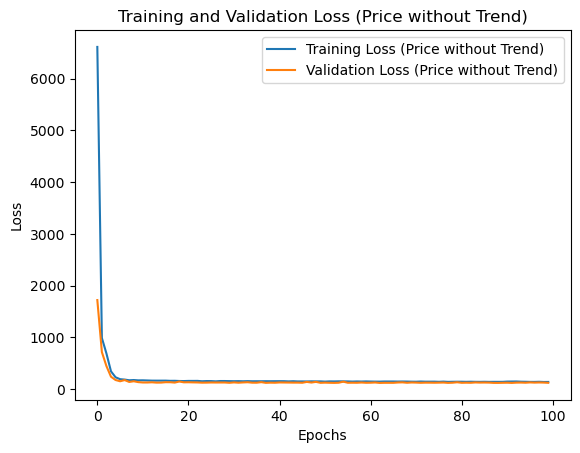

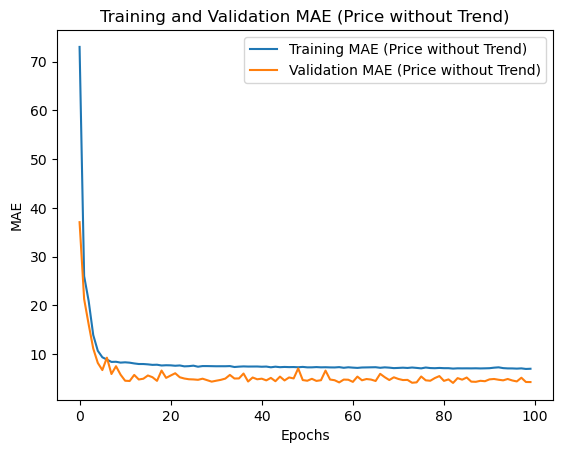

In [3]:
# 选择用于股价预测的特征（不包含趋势预测特征）
features_price_no_trend = df_price[['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'SMA_5', 'SMA_10','Content_Sentiment_Score', 'Comment_Sentiment_Score']]

# 填充缺失值
features_price_no_trend.fillna(method='ffill', inplace=True)

# 数据标准化
scaler_price_no_trend = MinMaxScaler()
features_scaled_price_no_trend = scaler_price_no_trend.fit_transform(features_price_no_trend)

# 创建用于股价预测的训练集和测试集
X_price_no_trend, y_price_no_trend = create_dataset(features_scaled_price_no_trend, labels_price.values, time_step)
X_train_price_no_trend, X_test_price_no_trend, y_train_price_no_trend, y_test_price_no_trend = train_test_split(X_price_no_trend, y_price_no_trend, test_size=0.3, random_state=42)

# 构建股价预测模型（不使用趋势预测特征）
model_price_no_trend = Sequential()
model_price_no_trend.add(LSTM(150, input_shape=(time_step, X_train_price_no_trend.shape[2])))
model_price_no_trend.add(Dropout(0.2))
model_price_no_trend.add(Dense(1, activation='linear'))

# 编译模型
optimizer_price_no_trend = tf.keras.optimizers.Adam(learning_rate=0.001)
model_price_no_trend.compile(optimizer=optimizer_price_no_trend, loss='mse', metrics=['mae'])

# 训练模型
history_price_no_trend = model_price_no_trend.fit(X_train_price_no_trend, y_train_price_no_trend, epochs=100, batch_size=8, validation_data=(X_test_price_no_trend, y_test_price_no_trend))

# 评估模型
loss_price_no_trend, mae_price_no_trend = model_price_no_trend.evaluate(X_test_price_no_trend, y_test_price_no_trend)
print(f'Test Loss (Price without Trend): {loss_price_no_trend}, Test MAE (Price without Trend): {mae_price_no_trend}')

# 可视化训练和验证损失
plt.plot(history_price_no_trend.history['loss'], label='Training Loss (Price without Trend)')
plt.plot(history_price_no_trend.history['val_loss'], label='Validation Loss (Price without Trend)')
plt.title('Training and Validation Loss (Price without Trend)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 可视化训练和验证MAE
plt.plot(history_price_no_trend.history['mae'], label='Training MAE (Price without Trend)')
plt.plot(history_price_no_trend.history['val_mae'], label='Validation MAE (Price without Trend)')
plt.title('Training and Validation MAE (Price without Trend)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


Model with Trend Feature - Test Loss: 78.49149322509766, Test MAE: 3.877626419067383
Model without Trend Feature - Test Loss: 120.3055648803711, Test MAE: 4.272305965423584


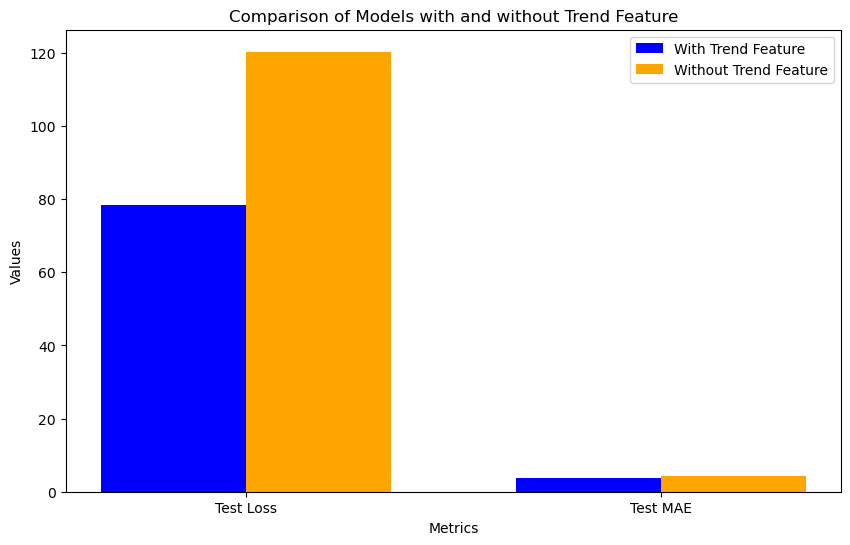

In [4]:
# 输出模型对比结果
print(f"Model with Trend Feature - Test Loss: {loss_price_with_trend}, Test MAE: {mae_price_with_trend}")
print(f"Model without Trend Feature - Test Loss: {loss_price_no_trend}, Test MAE: {mae_price_no_trend}")

import matplotlib.pyplot as plt

# 模型结果
metrics = ['Test Loss', 'Test MAE']
with_trend_values = [loss_price_with_trend, mae_price_with_trend]
without_trend_values = [loss_price_no_trend, mae_price_no_trend]

# 设置条形图的位置和宽度
x = range(len(metrics))
width = 0.35

# 绘制条形图
plt.figure(figsize=(10, 6))

plt.bar(x, with_trend_values, width, label='With Trend Feature', color='blue')
plt.bar([p + width for p in x], without_trend_values, width, label='Without Trend Feature', color='orange')

# 添加标签和标题
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Models with and without Trend Feature')
plt.xticks([p + width / 2 for p in x], metrics)

# 添加图例
plt.legend()

# 显示图表
plt.show()
